#Iris Flower Classification with Logistic Regression

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#download the data file and save in local folder
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [75]:
#import dataset .data file as CSV with separate parameter
datafile = pd.read_csv("/content/drive/MyDrive/MSR/5thSem/Classification/iris.data", sep=",")
datafile.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#Add Header in Dataset file
As datafile don't have header, so we will add header in datafile and used as CSV file

In [76]:
headerList = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
# converting data frame to csv
datafile.to_csv("iris_dataset.csv", header=headerList, index=False)
  
# display modified csv file
dataset = pd.read_csv("iris_dataset.csv")
print('\n Updated file:')
print(dataset)


 Updated file:
     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
0            4.9         3.0          1.4         0.2     Iris-setosa
1            4.7         3.2          1.3         0.2     Iris-setosa
2            4.6         3.1          1.5         0.2     Iris-setosa
3            5.0         3.6          1.4         0.2     Iris-setosa
4            5.4         3.9          1.7         0.4     Iris-setosa
..           ...         ...          ...         ...             ...
144          6.7         3.0          5.2         2.3  Iris-virginica
145          6.3         2.5          5.0         1.9  Iris-virginica
146          6.5         3.0          5.2         2.0  Iris-virginica
147          6.2         3.4          5.4         2.3  Iris-virginica
148          5.9         3.0          5.1         1.8  Iris-virginica

[149 rows x 5 columns]


In [77]:
#information of dataset file and datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [78]:
#check the null values in dataset
dataset.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [79]:
#As no null values are in dataset, now we will check the columns
dataset.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [80]:
#General statisctical details for each column
print(dataset.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


Visualize the each columns of dataset

In [81]:
# number of instances in each class
dataset.groupby('Species').size()

Species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#Dataset spliting

In [82]:
#define X and y axis
X = dataset.iloc[:,:4]
y = dataset.iloc[:,4]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [84]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(111, 4)
(38, 4)
(111,)
(38,)


#Classification Model

In [85]:
#import the model from sklearn
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

#model fitting with xtrain and ytrain
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [86]:
#Model predictions
y_predictions = LRmodel.predict(X_test)

#print the predictions
y_predictions

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [87]:
#check the model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_predictions)

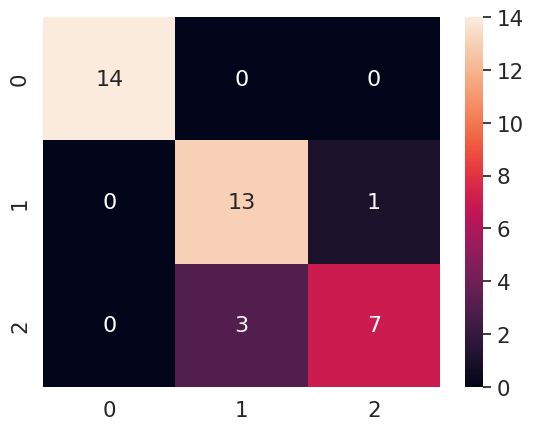

In [88]:
#plot the confusion matrics with Seaborn
sns.set(font_scale = 1.4)
sns.heatmap(cm, annot=True, annot_kws = {"size":16})
plt.show()

In [89]:
#print the accuracy
accuracy=accuracy_score(y_test,y_predictions)*100
print(accuracy)

89.47368421052632
